In [1]:
from scipy.linalg import eigh
import numpy as np
import matplotlib.pyplot as plt

# 5.1

In [2]:
def load_and_center_dataset(filename):
    data = np.load(filename)
    data = data - np.mean(data, axis=0)
    return data

In [3]:
x = load_and_center_dataset('YaleB_32x32.npy')
np.average(x)

-8.315174931741023e-17

# 5.2

In [4]:
def get_covariance(dataset):
    return (1/(len(dataset) -1)) *np.dot(np.transpose(dataset), dataset)

In [5]:
x = np.array([[1,2,5],[3,4,7]])
np.transpose(x)
np.dot(x, np.transpose(x))
np.dot(np.transpose(x), x)

array([[10, 14, 26],
       [14, 20, 38],
       [26, 38, 74]])

# 5.3

In [6]:
def multi_return ():
    return " a string " , 5
my_string , my_int = multi_return ()

In [7]:
def get_eig(S, m):
    #eigh <- 고유값과 고유벡터를 계산하기 위해 사용 (오름차순으로 반환하며, 대칭 행렬의 경우에는 특히 유용)
    eigenvalues, eigenvectors = eigh(S,subset_by_index = [len(S) - m, len(S) - 1]) #[len(S) - m, len(S) - 1(인덱스라 한개빼줘야 맨 마지막 값)] = largest eigenvalue (m개)
    #get the eigenvalues in decreasing order
    eigenvalues = np.flip(eigenvalues) #np.flip() -> 배열을 역순으로 정리
    eigenvalues = np.diag(eigenvalues) #np.diag() ->  k번째 열부터 있는 대각선의 값들을 1차원 array로 반환
    eigenvectors = np.fliplr(eigenvectors) #np.fliplr() -> 배열을 좌우반전으로 정리
    return eigenvalues, eigenvectors

In [8]:
S = get_covariance(x)
Lambda, U = get_eig(S, 2)
print(Lambda)
print(U)

[[102.99019514   0.        ]
 [  0.           1.00980486]]
[[-0.30262801  0.74984161]
 [-0.43852901  0.43852901]
 [-0.846232   -0.49540879]]


# 5.4

In [10]:
def get_eig_prop(S, prop):
    #eigh <- 고유값과 고유벡터를 계산하기 위해 사용 (오름차순으로 반환하며, 대칭 행렬의 경우에는 특히 유용)
    eigenvalues, eigenvectors = eigh(S)
    for i in range(len(eigenvalues)):
        if eigenvalues[i]/sum(eigenvalues) > prop:
            m = i
            break
    eigenvalues, eigenvectors = eigh(S, subset_by_index = [m, len(S)-1])
    eigenvalues = np.flip(eigenvalues) #np.flip() -> 배열을 역순으로 정리
    eigenvalues = np.diag(eigenvalues) #np.diag() ->  k번째 열부터 있는 대각선의 값들을 1차원 array로 반환
    eigenvectors = np.fliplr(eigenvectors) #np.fliplr() -> 배열을 좌우반전으로 정리
    return eigenvalues, eigenvectors

In [11]:
Lambda, U = get_eig_prop(S, 0.07)
print(Lambda)
print(U)

[[102.99019514]]
[[-0.30262801]
 [-0.43852901]
 [-0.846232  ]]


# 5.5

In [12]:
def project_image(image, U):
    transpose = np.transpose(U)
    ans = np.empty(0)
    for i in range(len(U)):
        projection = np.dot(np.dot(transpose, image),U[i])
        ans = np.append(ans, projection)
    return ans
    

In [13]:
projection = project_image(x[0], U)
print(projection)

[1.63747358 2.37281295 4.57883103]


# 5.6

In [21]:
def display_image(orig, proj):
    #Reshape the images to be 32 × 32
    orig = np.rot90(np.reshape(orig,(32,32)), axes = (1, 0))
    proj = np.rot90(np.reshape(proj,(32,32)), axes = (1, 0))
    fig, (ax1, ax2) = plt.subplots(figsize=(9, 3), ncols=2)
    ax1.set_title("Original")
    ax2.set_title("Projection")
    show1 = ax1.imshow(orig,aspect = 'equal')
    show2 = ax2.imshow(proj,aspect = 'equal')
    fig.colorbar(show1, ax=ax1)
    fig.colorbar(show2, ax=ax2)
    plt.show()
    return fig, ax1, ax2

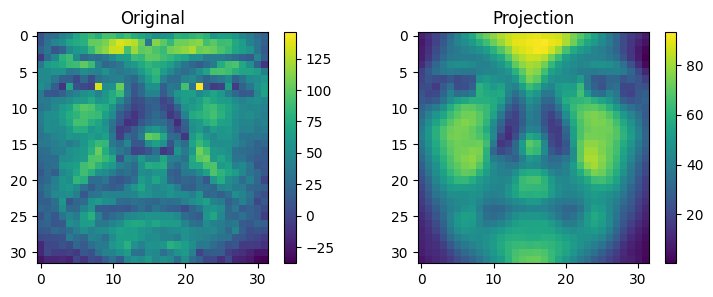

ValueError: too many values to unpack (expected 2)

In [22]:
x = load_and_center_dataset('YaleB_32x32.npy')
S = get_covariance(x)
Lambda, U = get_eig(S, 2)
projection = project_image(x[0], U)
fig, (ax1, ax2) = display_image(x[0], projection)
plt.show()